In [1]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [10]:
import os
os.getcwd()


'/home/khushal/Desktop/code/ML/projects/heart_failure_prediction/src'

In [11]:
data = pd.read_csv("../data/heart_failure_clinical_records_dataset.csv") 
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
print("Shape of the data", data.shape)

Shape of the data (299, 13)


In [13]:
print("Information about data:- ") 
data.info()

Information about data:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 

In [14]:
print("describing the data:- ") 
data.describe()

describing the data:- 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Total No. Of Living Cases :-  203
Total No. Of Died Cases :-  96


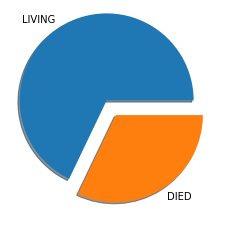

In [15]:
# seeing the distribution of classes, this will help us to identify which types 

len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live , len_death]) 
labels = ['LIVING', 'DIED'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 


/home/khushal/Desktop/code/ML/projects/heart_failure_prediction/.env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


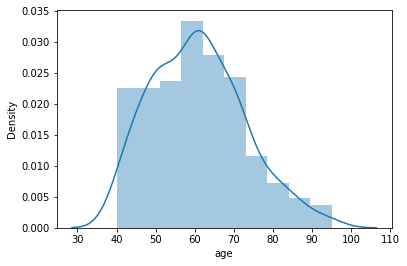

In [16]:
# seeing the distribution of Age  

sns.distplot(data["age"]) 
plt.show()

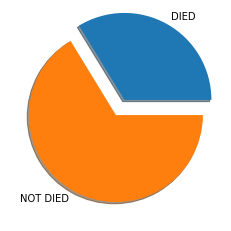

Total no. of died cases,  85
Total no. of not died cases,  167


In [17]:
# selecting rows that are above age 50 and seeing died or not 
age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]  

len_died = len(age_above_50_died) 
len_not_died = len(age_above_50_not_died) 

arr1 = [len_died, len_not_died] 
labels = ['DIED', 'NOT DIED'] 

plt.pie(arr1, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

print ("Total no. of died cases, ", len_died) 
print("Total no. of not died cases, ", len_not_died)
# inference in most of the cases people aged above 50 not died but accordinly if you compare with above 
# plot you will be seeing that died ration is comparitively higher here

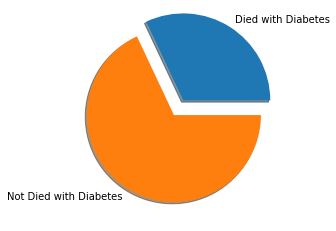

In [18]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0] 
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1) 
len_d_alive = len(patient_nhave_diabetes_0) 

arr2 = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr2, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

# inference:- here you can see the that the most of the person are alive who have diabetes

" \n - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. \n - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  \n - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  \n - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   \n - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.\n"

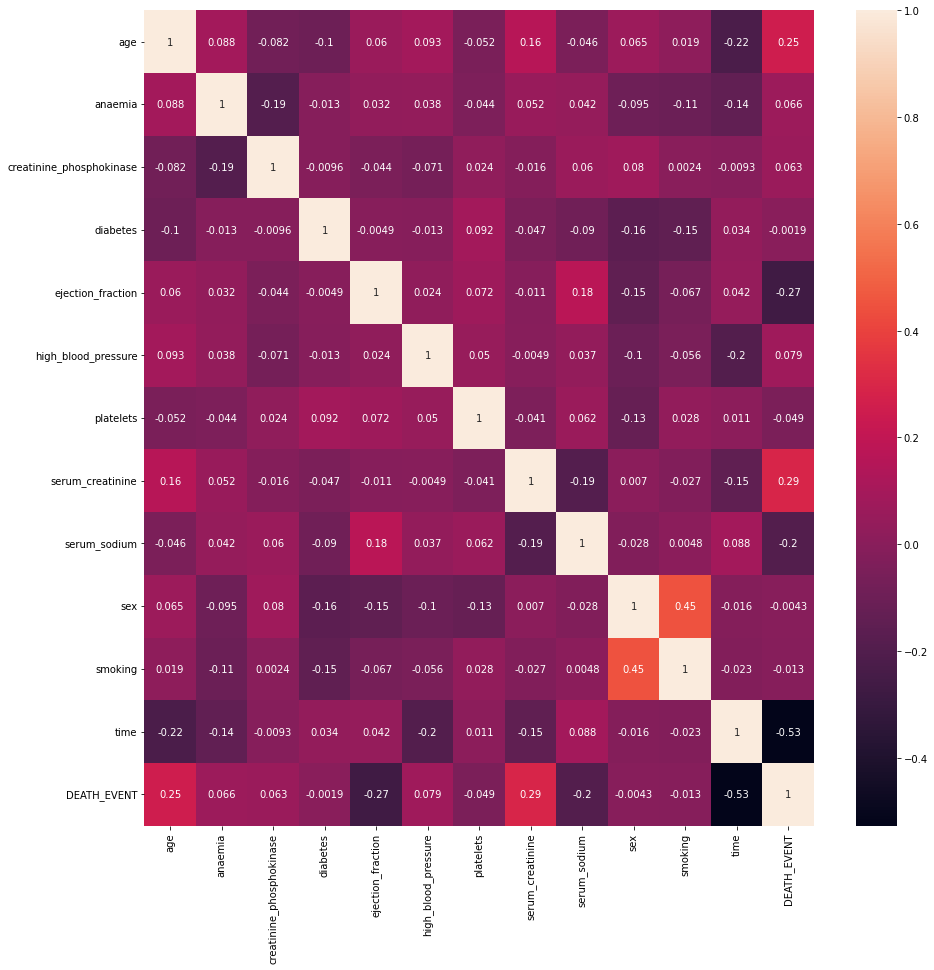

In [19]:
# checking the Correlation of our variables  

corr = data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

# interpretation of correlation matrix 

''' 
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
''' 

# references:- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [21]:
# you can do the same as here 
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316
